# GRIP At The Spark Foundation
## Name : Riya Bhatiya
## Task 2 : To explore UnSupervised Machine Learning.
### From the given ‘Iris’ dataset, predict the optimum number of clusters(K-Means) and represent it visually.

## UnSupervised Learning:
### Unsupervised learning is the training of machine using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance. Here the task of machine is to group unsorted information according to similarities, patterns and differences without any prior training of data. 

## Clustering:
###  A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.

## K-Means Clustering:
### It is the simplest unsupervised learning algorithm that solves clustering problem.K-means algorithm partition n observations into k clusters where each observation belongs to the cluster with the nearest mean serving as a prototype of the cluster .

## Step-1 --

In [1]:
# import the requird Libraries
import pandas as pd #for reading dataset
import numpy as np #for calculation
import matplotlib.pyplot as plt #for Visualizatio
from sklearn import datasets #loading data from sklearn
from sklearn.cluster import KMeans #for using build-in KMeans Algo.
%matplotlib inline

## Step-2 --

In [2]:
# Load the iris dataset and store it in Dataframe
iris = pd.read_csv("F:\\Iris.csv", usecols = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
iris
#iris = datasets.load_iris()
#iris_df = pd.DataFrame(iris.data, columns= ['Id'], ['SepalLengthCm'], ['SepalWidthCm'], ['PetalLengthCm'], ['PetalWidthCm'])
#see 5 rows
#iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


## Step-3 --

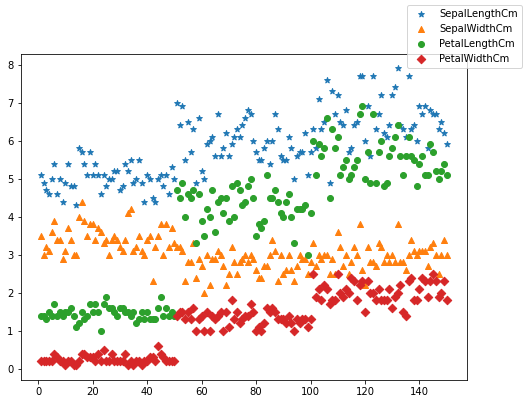

In [3]:
#Data Visualization
dia = plt.figure(figsize=(8,6))
plt.scatter(x = iris.Id, y = iris.SepalLengthCm, marker = '*' )
plt.scatter(x = iris.Id, y = iris.SepalWidthCm, marker = '^' )
plt.scatter(x = iris.Id, y = iris.PetalLengthCm, marker = 'o' )
plt.scatter(x = iris.Id, y = iris.PetalWidthCm, marker = 'D' )
dia.legend(labels=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm' ])
plt.show()

### How to find the value of K

In [4]:
KMean = KMeans(n_clusters = 5)
KMean.fit(iris.iloc[:, [0,1]])
print(KMean.cluster_centers_)
print(KMean.labels_)
print(KMean.inertia_)

[[ 74.           5.99032258]
 [135.5          6.60666667]
 [ 15.           5.03793103]
 [105.           6.22903226]
 [ 44.           5.28965517]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
11319.204806822392


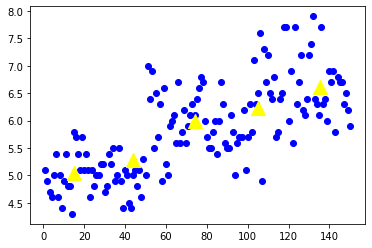

In [5]:
plt.scatter(x = iris.Id, y = iris.SepalLengthCm, color = 'Blue')
for i in range(0,5):
    plt.scatter(KMean.cluster_centers_[i,0], KMean.cluster_centers_[i,1], s = 200, color = 'Yellow', marker = '^')
plt.show()

## Step-4 --

In [6]:
#Finding the Optimal no. of clusters using Elbow Method

### There is a popular method known as "elbow method" which is used to determine the optimal value of K to perform the K-Means Clustering Algorithm. The basic idea behind this method is that it plots the various values of cost with changing k. As the value of K increases, there will be fewer elements in the cluster. So average distortion will decrease. The lesser number of elements means closer to the centroid. So, the point where this distortion declines the most is the elbow point.
#### The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as the inertia or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.
#### The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.
#### The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion


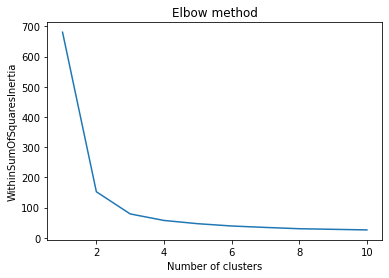

In [7]:
r = iris.iloc[:, [1, 2, 3, 4]].values
wcss = []
for i in range(1, 11):
    kmean = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmean.fit(r)
    wcss.append(kmean.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WithinSumOfSquaresInertia') # Within cluster sum of squares
plt.show()

#### You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
#### From this we choose the number of clusters as '3'.

## Step-5 --

In [8]:
#Creating the K-Means Classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(r)

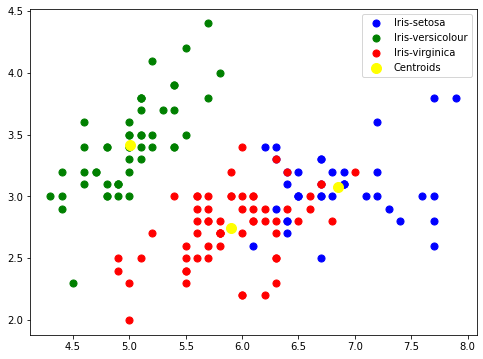

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(r[y_kmeans == 0, 0], r[y_kmeans == 0, 1], s = 50, c = 'blue', label = 'Iris-setosa')
plt.scatter(r[y_kmeans == 1, 0], r[y_kmeans == 1, 1], s = 50, c = 'green', label = 'Iris-versicolour')
plt.scatter(r[y_kmeans == 2, 0], r[y_kmeans == 2, 1],s = 50, c = 'red', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

## Other combination

Text(0.5, 1.0, 'Petal Length vs. Petal Width')

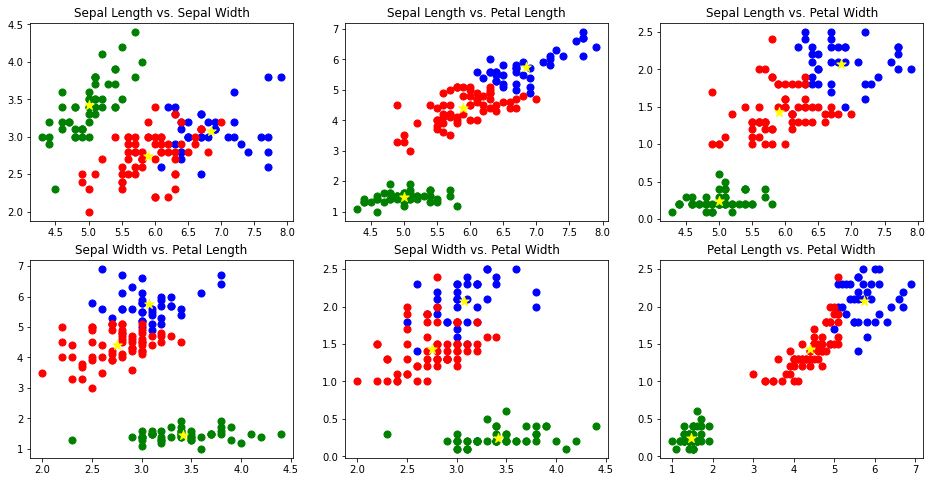

In [10]:
fig, axs = plt.subplots(2, 3, figsize = (16, 8))
a = 0
b = 0
for i in range(0, 4):
    for j in range(i+1, 4):
        if a < 3:
            axs[0, a].scatter(r[y_kmeans == 0, i], r[y_kmeans == 0, j], s = 50, c = 'blue', label = 'Iris-setosa')
            axs[0, a].scatter(r[y_kmeans == 1, i], r[y_kmeans == 1, j],s = 50, c = 'green', label = 'Iris-versicolour')
            axs[0, a].scatter(r[y_kmeans == 2, i], r[y_kmeans == 2, j],s = 50, c = 'red', label = 'Iris-verginica')
            axs[0, a].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:,j], s = 100, c = 'yellow', label = 'Centroids', marker = "*")
            a = a + 1
        elif b < 3:
            axs[1, b].scatter(r[y_kmeans == 0, i], r[y_kmeans == 0, j], s = 50, c = 'blue', label = 'Iris-setosa')
            axs[1, b].scatter(r[y_kmeans == 1, i], r[y_kmeans == 1, j],s = 50, c = 'green', label = 'Iris-versicolour')
            axs[1, b].scatter(r[y_kmeans == 2, i], r[y_kmeans == 2, j],s = 50, c = 'red', label = 'Iris-verginica')
            axs[1, b].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:,j], s = 100, c = 'yellow', label = 'Centroids', marker = "*")
            b = b + 1

axs[0, 0].set_title('Sepal Length vs. Sepal Width')
axs[0, 1].set_title('Sepal Length vs. Petal Length')
axs[0, 2].set_title('Sepal Length vs. Petal Width')
axs[1, 0].set_title('Sepal Width vs. Petal Length')
axs[1, 1].set_title('Sepal Width vs. Petal Width')
axs[1, 2].set_title('Petal Length vs. Petal Width')

## Thank you!!